# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.1+cu121


'cpu'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
# 1.self driving car such as Tesla using computer vision
# 2.Healthcare imaging, such as using computer vision to help interpret X-rays
# 3. Security, face recognition

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [4]:
#overfitting is like memorizing the training data set too well however does not generalize to unseen data.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
#Regularization techniques: you could use drop out on your neural network.
# Use a different model. maybe the model you are using for a speciific problem is too complicated, as in it's learning the data too well or you could pick a totally different model altogether.
# you could use a transfer learning
#reduce noise in data/cleanup dataset/introduce the data augmentation techniques- artificiallyy increase the diversity of your training dataset.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [6]:
# import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
print(torch.__version__)
print(torchvision.__version__)


# setup training data
from torchvision import datasets
train_data = datasets.MNIST(
    root = 'data', # where to download data to ?
    train = True, # Do we want the training datasets
    download = True, # Do we want to download yes/no ?
    transform = torchvision.transforms.ToTensor(),# convert the downloaded images into tensors i.e. how do we want to transform the data?
    target_transform = None#Do we want to transform the labels, i.e. how do we want to transform the labels/targets

)

test_data = datasets.MNIST(
    root = 'data', # where to download data to ?
    train = False, # Do we want the training datasets
    download = True, # Do we want to download yes/no ?
    transform = ToTensor(),# convert the downloaded images into tensors i.e. how do we want to transform the data?
    target_transform = None#Do we want to transform the labels, i.e. how do we want to transform the labels/targets

)

2.2.1+cu121
0.17.1+cu121


## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [7]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


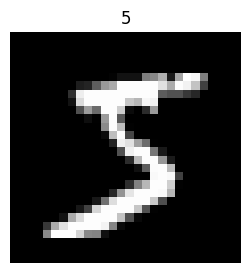

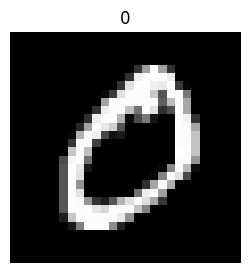

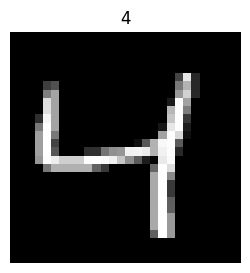

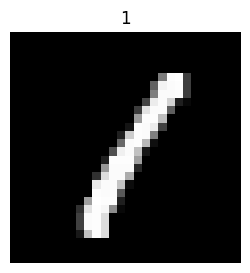

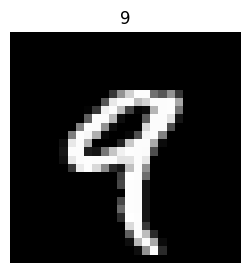

In [8]:

import matplotlib.pyplot as plt
for i in range(5):
  img = train_data[i][0]
  print(img.shape)
  img_squeeze = img.squeeze()
  print(img_squeeze.shape)
  label = train_data[i][1]
  plt.figure(figsize=(3, 3))
  plt.imshow(img_squeeze, cmap="gray")
  plt.title(label)
  plt.axis(False);

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [9]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset = train_data,
                               batch_size =BATCH_SIZE,
                               shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                               batch_size =BATCH_SIZE,
                               shuffle = False)# for evaluation purpose there is no need to shuffle the data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7caa93af9000>,
 <torch.utils.data.dataloader.DataLoader at 0x7caa93afa8c0>)

In [10]:
for sample in next(iter(train_dataloader)):
  print(sample.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [11]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [12]:
# Create a Convolutional network
class MNIST_Model(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website.
  """
  def __init__(self, input_shape:int, hidden_units:int,output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        #Create a conv layer: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels= input_shape,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)## default stride value is same as kernel_size
    )

    self.conv_block_2 = nn.Sequential(
        #Create a conv layer: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units,
                  out_channels = hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameter
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features = output_shape),
        #nn.ReLU()
    )

  def forward(self,x):
    x= self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x= self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x= self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x



## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [13]:
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)

if Path("helper_function.py").is_file():
  print("helper_function.py already exists, skipping download")

else:
  print("Download helper_function.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)
# Import accuracy_fn
from helper_function import accuracy_fn,plot_predictions, plot_decision_boundary

helper_function.py already exists, skipping download


In [14]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device=device):
  """Performs a training with model trying to learn on data loader"""
  ### Training
  train_loss, train_acc = 0, 0
  model.to(device)

  # Put model into training mode
  model.train()
  # Add a loop to loop through the training batches
  # X---> image, y--->label
  for batch, (X,y) in enumerate(data_loader):
    # Send data to GPU
    X, y = X.to(device), y.to(device)

    # 1. Forward pass(outputs the raw logits from the model)
    y_pred= model(X)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss+=loss  # accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred = y_pred.argmax(dim=1))# go from logits -> prediction labels

    # 3. Zero the gradients of the optimizer
    optimizer.zero_grad()

    # 4. Loss backward or perform backpropagation
    loss.backward()

    # 5. Progress/step the optimizer step
    optimizer.step()



  # Divide total train loss by length of train dataloader
  train_loss /=len(data_loader)
  train_acc /=len(data_loader)
  print(f"Train loss: {train_loss:.5f}| Train acc:{train_acc:.2f}%")



In [15]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """ Performs a testing loop step on model going over data_loader."""

  ### Testing
  test_loss, test_acc = 0,0
  #put the model in eval mode
  model.eval()

  with torch.inference_mode():
    # X->X_test, y->y_test
    for X,y in data_loader:
      # Send the data to the target device
      X,y = X.to(device), y.to(device)

      # 1. Forward Pass
      test_pred = model(X)

      # 2. Calculate the loss(accumulatively)
      test_loss += loss_fn(test_pred, y)

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true= y, y_pred= test_pred.argmax(dim=1))
      #why we do this? well because recall that the outputs of our model, the raw outputs of our model are going to be logits and our accuracy
      #function expects our true labels and our predictions to be in the same format, if our test_pred is just logits we have to call argmax to find the logit value with
      #the heighest index and that will be the prediction label and so then we are comparing labels. so that's what argmax does here.

    #adjust the metrics and print out
    #calculate the test loss average per batch
    test_loss /= len(data_loader)

    # Calculate the test accuracy average per batch
    test_acc /= len(data_loader)
    # Printout what's Happening
    print(f"\n Test loss: {test_loss:.5f}| Test acc:{test_acc:.2f}% \n")

In [16]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """ Returns a disctionary containing the results of model predicting on data_loader."""

  loss, acc = 0,0

  model.eval()

  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      # Send the data to the target device , i.e make our data device agnostic
      X,y = X.to(device), y.to(device)
      #Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y,
                         y_pred = y_pred.argmax(dim=1))

    # Scale loss and acc to find the average loss/acc per batch
    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}


In [17]:
torch.manual_seed(42)
model_2 = MNIST_Model(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

In [18]:
from helper_function import accuracy_fn
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_2.parameters(), #tries to update our model's parameters to reduce the loss
                            lr=0.1)

In [19]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end:float,
                     device: torch.device=None):
  """Prints difference between start and end time."""
  total_time = end-start
  print(f"Train time on{device}: {total_time:.3f} seconds")
  return total_time


In [20]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
from tqdm.auto import tqdm


# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model
epochs = 5
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n --------")
  train_step(model= model_2,
               data_loader = train_dataloader,
               loss_fn = loss_fn,
               optimizer = optimizer,
               accuracy_fn = accuracy_fn,
               device = device)

  test_step(model = model_2,
            data_loader=test_dataloader,
            loss_fn = loss_fn,
            accuracy_fn = accuracy_fn,
            device = device)

train_time_end_model_2 = timer()

total_train_time_model_2 =print_train_time(start=  train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device = device)



  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
 --------
Train loss: 0.33501| Train acc:88.72%

 Test loss: 0.07308| Test acc:97.66% 

Epoch: 1
 --------
Train loss: 0.08138| Train acc:97.46%

 Test loss: 0.06868| Test acc:97.71% 

Epoch: 2
 --------
Train loss: 0.06366| Train acc:98.00%

 Test loss: 0.05814| Test acc:98.10% 

Epoch: 3
 --------
Train loss: 0.05497| Train acc:98.23%

 Test loss: 0.06073| Test acc:98.02% 

Epoch: 4
 --------
Train loss: 0.04951| Train acc:98.47%

 Test loss: 0.04516| Test acc:98.39% 

Train time oncpu: 197.297 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.<br>

> Note: There are two main agreed upon ways for representing images in machine learning:

>Color channels first: [color_channels, height, width] (CHW) -> PyTorch default (as of April 2022)
Color channels last: [height, width, color_channels] (HWC) -> Matplotlib/TensorFlow default (as of April 2022)

In [21]:
## 9. Make and evaluate random predictions with best model

def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device=device):

  pred_probs = []
  model.to(device)
  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logit--> prediction probability)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim =0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [22]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first sample
test_samples[0].shape

torch.Size([1, 28, 28])

In [23]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
# Are our predictions in the same form as our test labels?
test_labels, pred_classes

([5, 3, 9, 1, 3, 6, 2, 2, 8], tensor([5, 3, 9, 1, 3, 6, 2, 2, 8]))

In [24]:

# Get the class names from the dataset
class_names = test_data.classes
class_names


['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

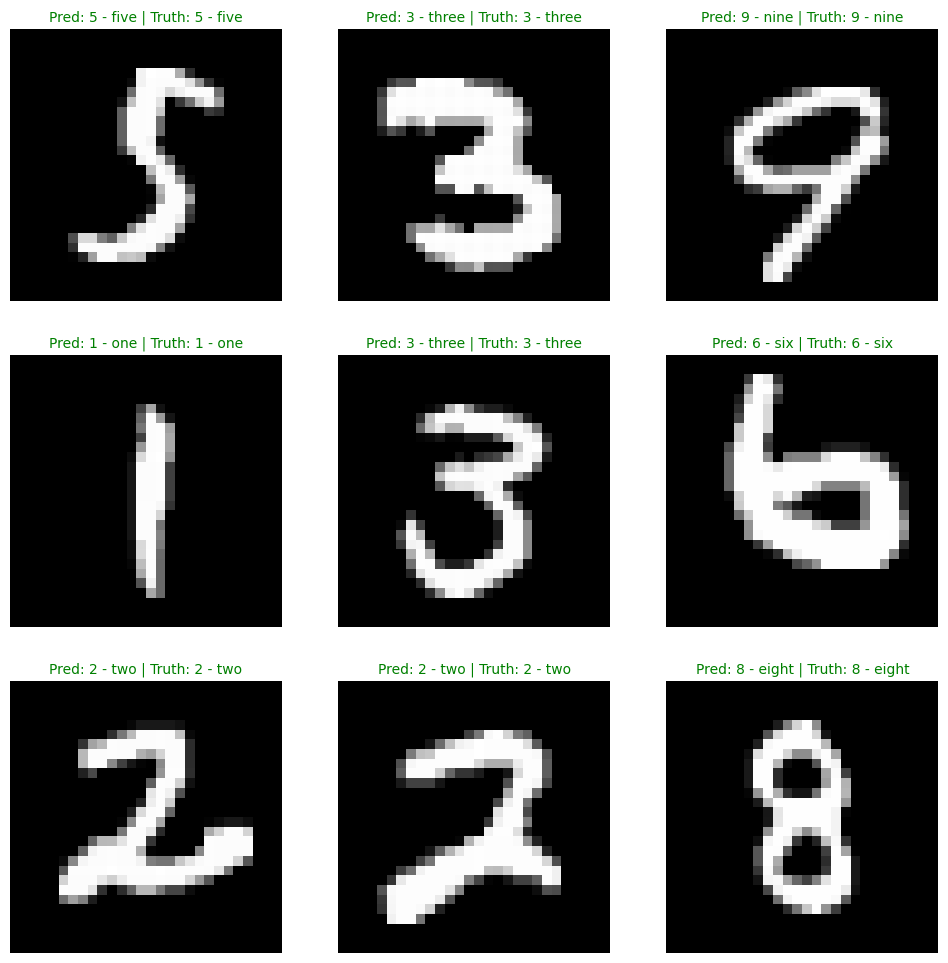

In [25]:
# Plot predictions
plt.figure(figsize=(12,12))
nrows=3
ncols=3

for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the targets image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label(in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # Green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)


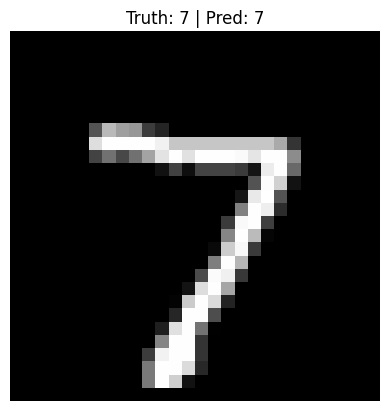

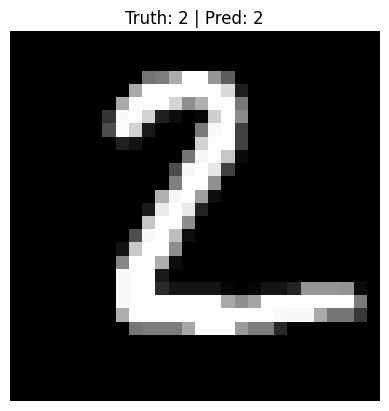

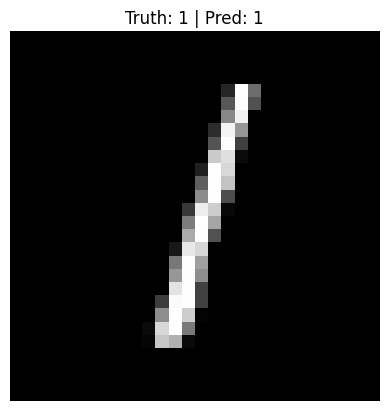

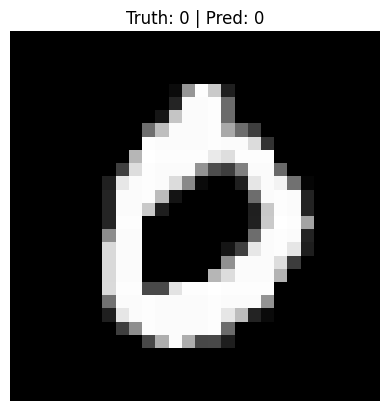

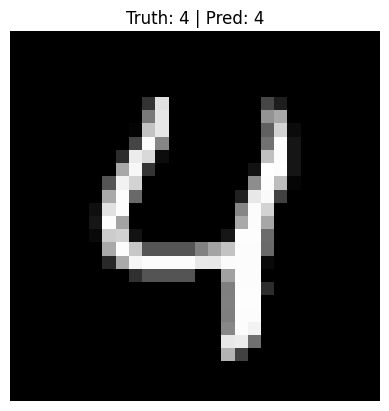

In [26]:

num_to_plot = 5
for i in range(num_to_plot):
  # Get image and labels from the test data
  img = test_data[i][0]
  label = test_data[i][1]

  # Make prediction on image
  model_pred_logits = model_2(img.unsqueeze(dim=0).to(device))
  model_pred_probs = torch.softmax(model_pred_logits, dim=1)
  model_pred_label = torch.argmax(model_pred_probs, dim=1)

  # Plot the image and prediction
  plt.figure()
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(f"Truth: {label} | Pred: {model_pred_label.cpu().item()}")
  plt.axis(False);


## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [27]:
# Import tqdm.auto
from tqdm.auto import tqdm



# 1. Make predictions with trained model
y_preds= []
model_2.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader, desc="Making predictions"):
    # Send the data and target to target device
    X,y =X.to(device), y.to(device)

    # Do the forward pass
    y_logit = model_2(X)

    # Turn predictions from logits-> prediction probabilities-> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)

    # Put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())

# Concatenate list of predictions into a tensor
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

In [28]:
# See if required packages are installed and if not, install them...

try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__} ")
  assert int(mlxtend.__version__.split(".")[1])>=19, "mlxtend version should be 0.19.0 or higher"

except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.23.1 


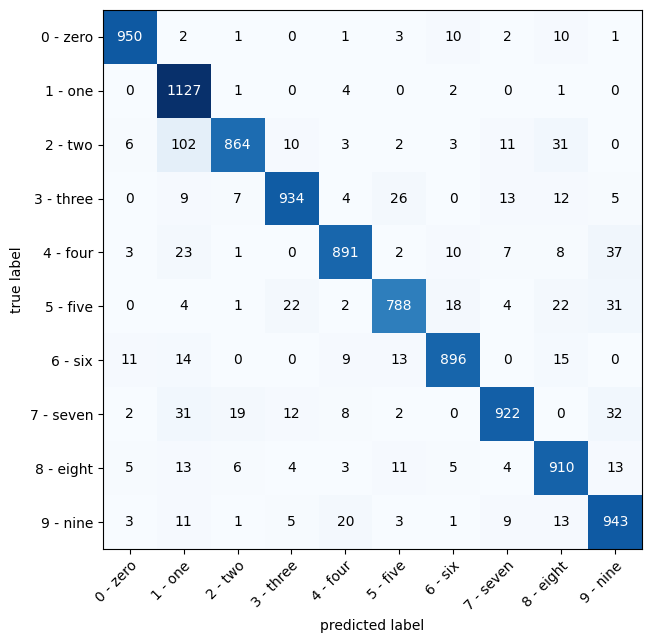

In [29]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [30]:
random_tensor = torch.rand([1,3,64,64])
random_tensor.shape, type(random_tensor)

(torch.Size([1, 3, 64, 64]), torch.Tensor)

In [31]:
conv_layer= nn.Conv2d(in_channels= 3,
                  out_channels = 64,
                  kernel_size=3,
                  stride=1,
                  padding=1) #values we can set ourselves in our NN's are called hyperparameter

print(f"Random tensor original shape: {random_tensor.shape}")
random_tensor_through_conv_layer = conv_layer(random_tensor)
print(f"Random tensor through conv layer shape: {random_tensor_through_conv_layer.shape}")

Random tensor original shape: torch.Size([1, 3, 64, 64])
Random tensor through conv layer shape: torch.Size([1, 64, 64, 64])


## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [32]:
# setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = 'data', # where to download data to ?
    train = True, # Do we want the training datasets
    download = True, # Do we want to download yes/no ?
    transform = torchvision.transforms.ToTensor(),# convert the downloaded images into tensors i.e. how do we want to transform the data?
    target_transform = None#Do we want to transform the labels, i.e. how do we want to transform the labels/targets

)

test_data = datasets.FashionMNIST(
    root = 'data', # where to download data to ?
    train = False, # Do we want the training datasets
    download = True, # Do we want to download yes/no ?
    transform = ToTensor(),# convert the downloaded images into tensors i.e. how do we want to transform the data?
    target_transform = None#Do we want to transform the labels, i.e. how do we want to transform the labels/targets

)

In [33]:
# Get the class names of the Fashion MNIST dataset
fashion_mnist_class_names = train_data.classes
fashion_mnist_class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [34]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset = train_data,
                               batch_size =BATCH_SIZE,
                               shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                               batch_size =BATCH_SIZE,
                               shuffle = False)# for evaluation purpose there is no need to shuffle the data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7caa63645a20>,
 <torch.utils.data.dataloader.DataLoader at 0x7caa63645750>)

In [35]:
# model_2 is the same architecture as MNIST_model
model_2 = MNIST_Model(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_2

MNIST_Model(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [36]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [37]:
# Setup metrics
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn = Accuracy(num_classes = len(fashion_mnist_class_names), task="multiclass").to(device)

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Setup training/testing loop
epochs = 5

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n -----")
  ### Training
  train_loss, train_acc=0,0
  # Add a loop to loop through the training batches
  # X---> image, y--->label
  for batch, (X_train,y_train) in enumerate(train_dataloader):
    model_2.train()
    # 1. Forward pass
    y_pred= model_2(X_train)

    # 2. Calculate the loss (per batch)
    loss = loss_fn(y_pred, y_train)
    train_loss+=loss  # accumulate train loss
    train_acc+=acc_fn(y_pred, y_train)

    # 3. Zero the gradients of the optimizer
    optimizer.zero_grad()

    # 4. Loss backward or perform backpropagation
    loss.backward()

    # 5. Progress/step the optimizer step
    optimizer.step()


  # Divide total train loss by length of train dataloader
  train_loss /=len(train_dataloader)
  train_acc /=len(train_dataloader)


  ### Testing
  test_loss_total, test_acc = 0,0
  model_2.eval()

  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_dataloader):
      X_test,y_test = X_test.to(device), y_test.to(device)

      # 1. Forward Pass
      test_pred = model_2(X_test)

      # 2. Calculate the loss(accumulatively)
      test_loss = loss_fn(test_pred, y_test)
      test_loss_total+=test_loss
      test_acc+=acc_fn(test_pred, y_test)

      # 3. Calculate accuracy
      #test_acc += accuracy_fn(y_true= y_test, y_pred= test_pred.argmax(dim=1))
      #why we do this? well because recall that the outputs of our model, the raw outputs of our model are going to be logits and our accuracy
      #function expects our true labels and our predictions to be in the same format, if our test_pred is just logits we have to call argmax to find the logit value with
      #the heighest index and that will be the prediction label and so then we are comparing labels. so that's what argmax does here.

    #calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # Calculate the test accuracy average per batch
    test_acc /= len(test_dataloader)

  # Printout what's Happening
  print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc:{test_acc:.4f}")





  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
 -----

 Train loss: 1.3211 | Test loss: 0.0011, Test acc:0.7607
Epoch: 1 
 -----

 Train loss: 0.5678 | Test loss: 0.0007, Test acc:0.8160
Epoch: 2 
 -----

 Train loss: 0.4552 | Test loss: 0.0011, Test acc:0.8385
Epoch: 3 
 -----

 Train loss: 0.4122 | Test loss: 0.0013, Test acc:0.8525
Epoch: 4 
 -----

 Train loss: 0.3839 | Test loss: 0.0016, Test acc:0.8634
